# ⚖️ Notebook 3: Bias Detection with Fairlearn & AIF360
This notebook evaluates trained models for bias using fairness metrics.
We analyze fairness disparities based on sensitive attributes such as gender or age.

### 📦 Imports and Setup

In [86]:
# 📦 Imports and Setup
import pandas as pd
import numpy as np
import pickle
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_score,recall_score, f1_score, RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### 📁 Load Cleaned Data and Model

In [87]:
# 📥 Load Cleaned Dataset
df = pd.read_csv("cleaned_credit_data.csv")

# 🧪 Features and Target
X = df.drop('Risk_good', axis=1)
y = df['Risk_good']  # Binary target: 1 = good, 0 = bad

# 📏 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 Feature Scaling (only needed for models trained on scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


📊 Logistic Regression Results
Accuracy: 0.5619047619047619
ROC-AUC: 0.6036363636363636
Confusion Matrix:
 [[25 25]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

       False       0.54      0.50      0.52        50
        True       0.58      0.62      0.60        55

    accuracy                           0.56       105
   macro avg       0.56      0.56      0.56       105
weighted avg       0.56      0.56      0.56       105



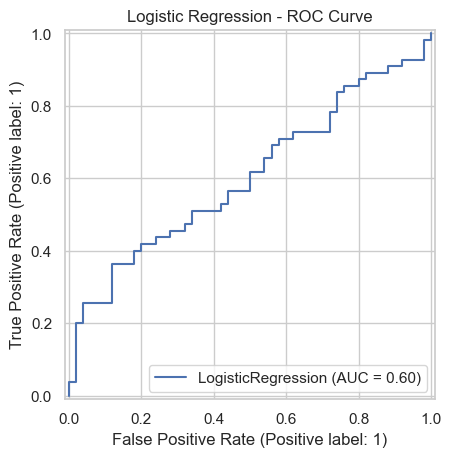

In [88]:
# 🔁 Load Saved Logistic Regression Model
with open("models/logistic_model.pkl", "rb") as f:
    log_reg = joblib.load(f)

y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()


📊 Random Forest Results
Accuracy: 0.5333333333333333
ROC-AUC: 0.5916363636363635
Confusion Matrix:
 [[23 27]
 [22 33]]
Classification Report:
               precision    recall  f1-score   support

       False       0.51      0.46      0.48        50
        True       0.55      0.60      0.57        55

    accuracy                           0.53       105
   macro avg       0.53      0.53      0.53       105
weighted avg       0.53      0.53      0.53       105



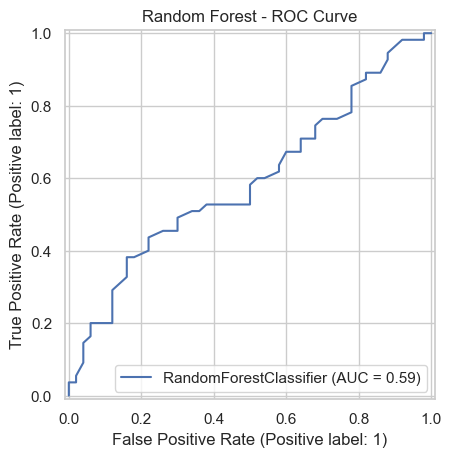

In [89]:
# 🌲 Load Saved Random Forest Model
with open("models/random_forest_model.pkl", "rb") as f:
    rf = joblib.load(f)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("📊 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()


📊 XGBoost Results
Accuracy: 0.6
ROC-AUC: 0.6178181818181818
Confusion Matrix:
 [[29 21]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

       False       0.58      0.58      0.58        50
        True       0.62      0.62      0.62        55

    accuracy                           0.60       105
   macro avg       0.60      0.60      0.60       105
weighted avg       0.60      0.60      0.60       105



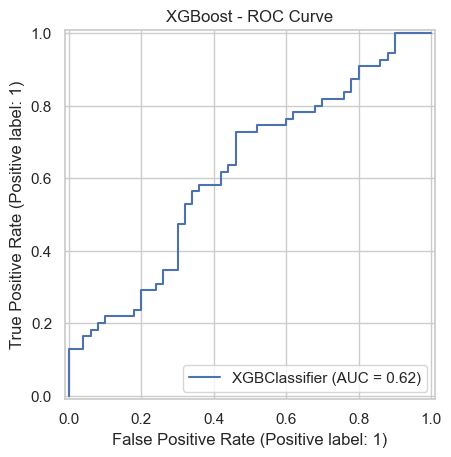

In [90]:
# 🚀 Load Saved XGBoost Model
with open("models/xgboost_model.pkl", "rb") as f:
    xgb = joblib.load(f)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("📊 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.title("XGBoost - ROC Curve")
plt.show()


/home/softnut/Desktop/portfolio/bias_detection/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/softnut/Desktop/portfolio/bias_detection/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


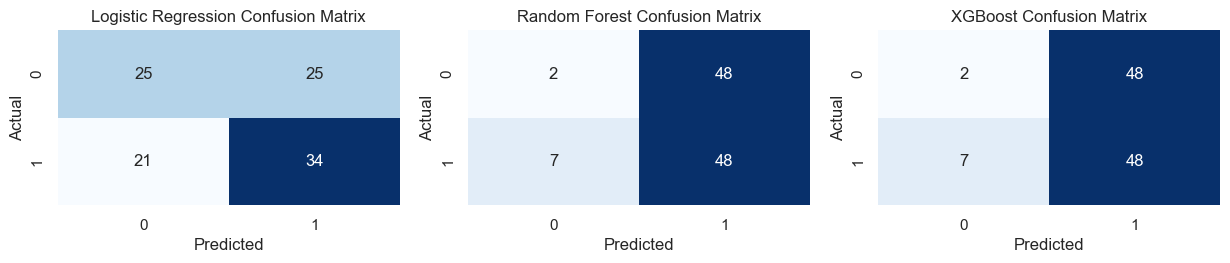

In [91]:
# 📌 Ensure models and test data are already loaded
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

results = []

plt.figure(figsize=(15, 5))

# 🎯 Iterate and evaluate each model
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc
    })

    # 📊 Confusion Matrix
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")



In [92]:
# 📝 Summary Table
results_df = pd.DataFrame(results).set_index("Model")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

/home/softnut/Desktop/portfolio/bias_detection/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


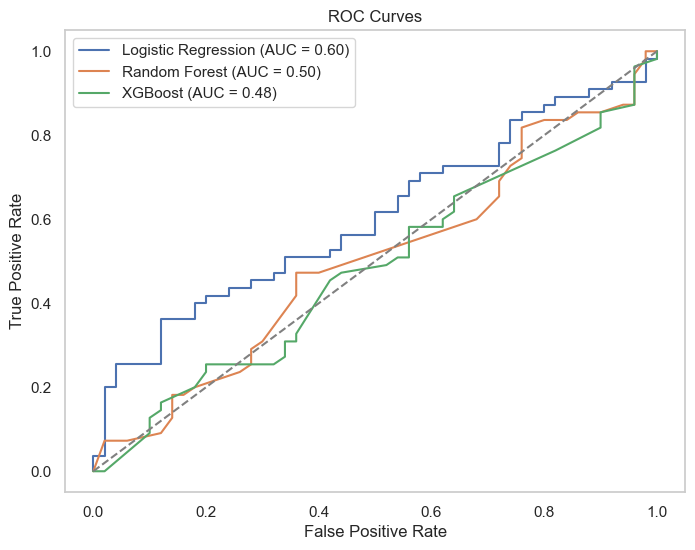

In [93]:

# 📈 ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [94]:

# 📊 Display Summary Table
print("📋 Model Performance Summary:")
display(results_df.style.background_gradient(cmap="YlGnBu"))


📋 Model Performance Summary:


,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Logistic Regression,0.561905,0.576271,0.618182,0.596491,0.603636
Random Forest,0.476190,0.500000,0.872727,0.635762,0.500364
XGBoost,0.476190,0.500000,0.872727,0.635762,0.483818
